In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assuming your file is named 'example.xlsx'
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/lenka model/Case Study Data 2W Data.xlsx')
df.head()# Display the first few rows of the dataframe


Anon_Brand Anon_Model Anon_Vehicle_Name Condition  Current Price  Mileage  \
0    Brand_1    Model_1         Vehicle_1      Used          60000    17500   
1    Brand_1    Model_1         Vehicle_2      Used          59100    12400   
2    Brand_1    Model_1         Vehicle_3      Used          73875     4700   
3    Brand_1    Model_1         Vehicle_4      Used          52000    20150   
4    Brand_1    Model_1         Vehicle_5      Used          58000    23652   

        City  Make Year    Fuel Transmission  Owners  On Road Price  Metro  \
0      Delhi       2020  Petrol    Automatic       2          90890  Metro   
1     Mumbai       2018  Petrol    Automatic       2          77460  Metro   
2     Mumbai       2020  Petrol    Automatic       2          92390  Metro   
3  Bangalore       2017  Petrol    Automatic       2          75850  Metro   
4  Bangalore       2018  Petrol    Automatic       2          79330  Metro   

     RV (%)  Age  Run Profile        Brand.1 Model Edition  
0  0.660139    4    14.583333  International        Normal  
1  0.762974    6     6.888889  International        Normal  
2  0.799600    4     3.916667  International        Normal  
3  0.685564    7     9.595238  International        Normal  
4  0.731123    6    13.140000  International        Normal

In [ ]:
print(df.columns)


Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Condition',
       'Current Price', 'Mileage', 'City', 'Make Year', 'Fuel', 'Transmission',
       'Owners', 'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile',
       'Brand.1', 'Model Edition'],
      dtype='object')


#data preprocessing and cleaning

In [ ]:
data_info = df.info()
data_info
data_description = df.describe()
data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anon_Brand         8397 non-null   object 
 1   Anon_Model         8397 non-null   object 
 2   Anon_Vehicle_Name  8397 non-null   object 
 3   Condition          8397 non-null   object 
 4   Current Price      8397 non-null   int64  
 5   Mileage            8397 non-null   int64  
 6   City               8387 non-null   object 
 7   Make Year          8397 non-null   int64  
 8   Fuel               8397 non-null   object 
 9   Transmission       8396 non-null   object 
 10  Owners             8397 non-null   int64  
 11  On Road Price      8397 non-null   int64  
 12  Metro              8397 non-null   object 
 13  RV (%)             8397 non-null   float64
 14  Age                8397 non-null   int64  
 15  Run Profile        8397 non-null   float64
 16  Brand.1            8397 

Current Price        Mileage    Make Year       Owners  On Road Price  \
count    8397.000000    8397.000000  8397.000000  8397.000000    8397.000000   
mean    53370.407646   17392.602120  2017.587353     1.045612   80186.089794   
std     15385.509508   13270.685277     2.053802     0.208654    8780.630662   
min     15000.000000       0.000000  2014.000000     1.000000   60406.000000   
25%     42000.000000   11000.000000  2016.000000     1.000000   74970.000000   
50%     52000.000000   16000.000000  2018.000000     1.000000   77650.000000   
75%     63000.000000   21764.000000  2019.000000     1.000000   83015.000000   
max    122970.000000  388882.000000  2023.000000     2.000000  124960.000000   

            RV (%)          Age  Run Profile  
count  8397.000000  8397.000000  8397.000000  
mean      0.657661     6.412647     9.397551  
std       0.141296     2.053802     6.595314  
min       0.197265     1.000000     0.000000  
25%       0.560224     5.000000     6.190476  
50%       0.664733     6.000000     8.470556  
75%       0.756997     8.000000    11.250000  
max       1.316117    10.000000   139.056667

In [ ]:
# Check for missing values
print(df.isnull().sum())



Anon_Brand            0
Anon_Model            0
Anon_Vehicle_Name     0
Condition             0
Current Price         0
Mileage               0
City                 10
Make Year             0
Fuel                  0
Transmission          1
Owners                0
On Road Price         0
Metro                 0
RV (%)                0
Age                   0
Run Profile           0
Brand.1               0
Model Edition         0
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()
# Check for missing values
print(df.isnull().sum())


Anon_Brand           0
Anon_Model           0
Anon_Vehicle_Name    0
Condition            0
Current Price        0
Mileage              0
City                 0
Make Year            0
Fuel                 0
Transmission         0
Owners               0
On Road Price        0
Metro                0
RV (%)               0
Age                  0
Run Profile          0
Brand.1              0
Model Edition        0
dtype: int64


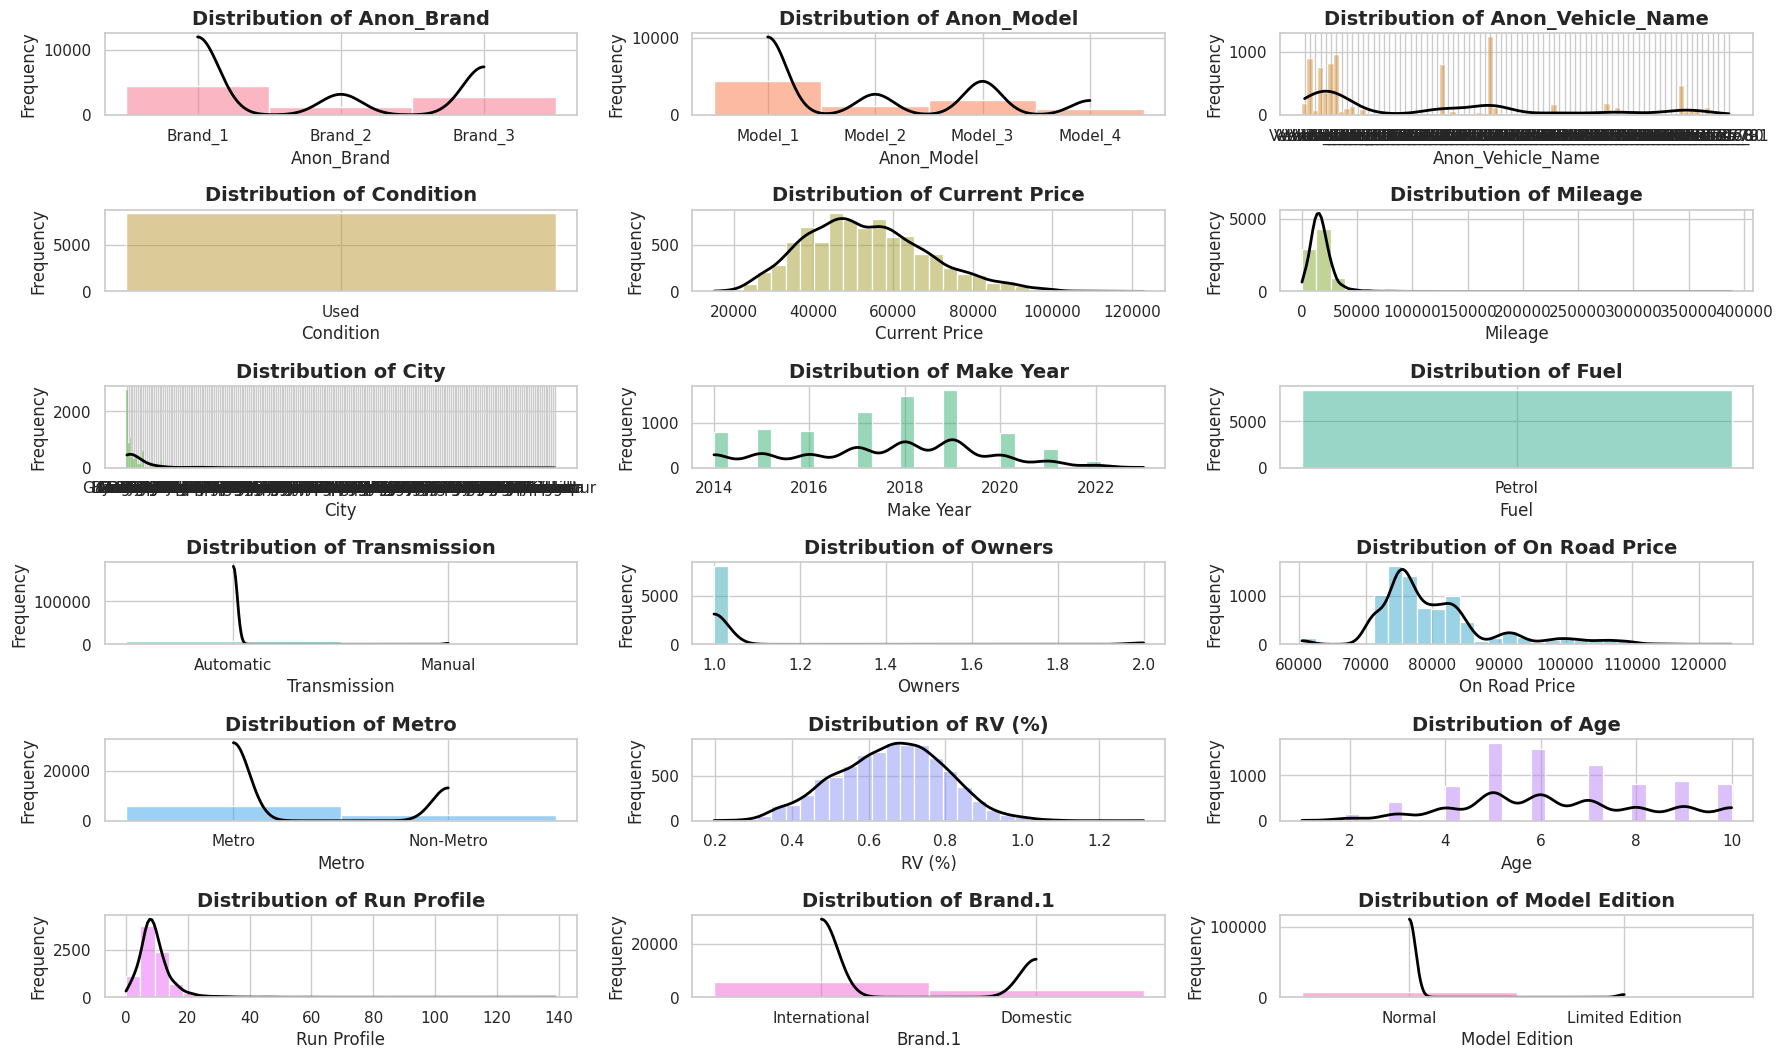

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

attributes = df.columns
plt.figure(figsize=(18, 12))

# Define a color palette with a number of colors equal to the number of attributes
colors = sns.color_palette("husl", len(attributes))

# Loop through each attribute and plot its distribution
for i, attribute in enumerate(attributes):
    plt.subplot(len(attributes) // 3 + 1, 3, i + 1)
    sns.histplot(df[attribute], kde=True, bins=30, color=colors[i])

    # Check if a KDE line was plotted and then modify it
    ax = plt.gca()
    if len(ax.lines) > 0:  # Ensure there is at least one line (the KDE)
        kde_line = ax.lines[-1]
        kde_line.set_linewidth(2)
        kde_line.set_color("black")

    plt.title(f"Distribution of {attribute}", fontsize=14, fontweight="bold")
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Display columns before removal
print("Columns before removal:")
print(df.columns)

# Remove columns with the same value in all rows
df = df.loc[:, df.nunique() > 1]

# Display columns after removal
print("\nColumns after removal:")
print(df.columns)



Columns before removal:
Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Condition',
       'Current Price', 'Mileage', 'City', 'Make Year', 'Fuel', 'Transmission',
       'Owners', 'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile',
       'Brand.1', 'Model Edition'],
      dtype='object')

Columns after removal:
Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Current Price',
       'Mileage', 'City', 'Make Year', 'Transmission', 'Owners',
       'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile', 'Brand.1',
       'Model Edition'],
      dtype='object')


In [ ]:
data_info = df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
Index: 8387 entries, 0 to 8396
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anon_Brand         8387 non-null   object 
 1   Anon_Model         8387 non-null   object 
 2   Anon_Vehicle_Name  8387 non-null   object 
 3   Current Price      8387 non-null   int64  
 4   Mileage            8387 non-null   int64  
 5   City               8387 non-null   object 
 6   Make Year          8387 non-null   int64  
 7   Transmission       8387 non-null   object 
 8   Owners             8387 non-null   int64  
 9   On Road Price      8387 non-null   int64  
 10  Metro              8387 non-null   object 
 11  RV (%)             8387 non-null   float64
 12  Age                8387 non-null   int64  
 13  Run Profile        8387 non-null   float64
 14  Brand.1            8387 non-null   object 
 15  Model Edition      8387 non-null   object 
dtypes: float64(2), int64(6), obje

In [1]:

# Define categorical and numerical columns based on remaining columns
categorical_cols = ['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'City', 'Transmission', 'Metro', 'Brand.1', 'Model Edition']
numerical_cols = ['Current Price', 'Mileage', 'Make Year', 'On Road Price', 'Age', 'Run Profile']



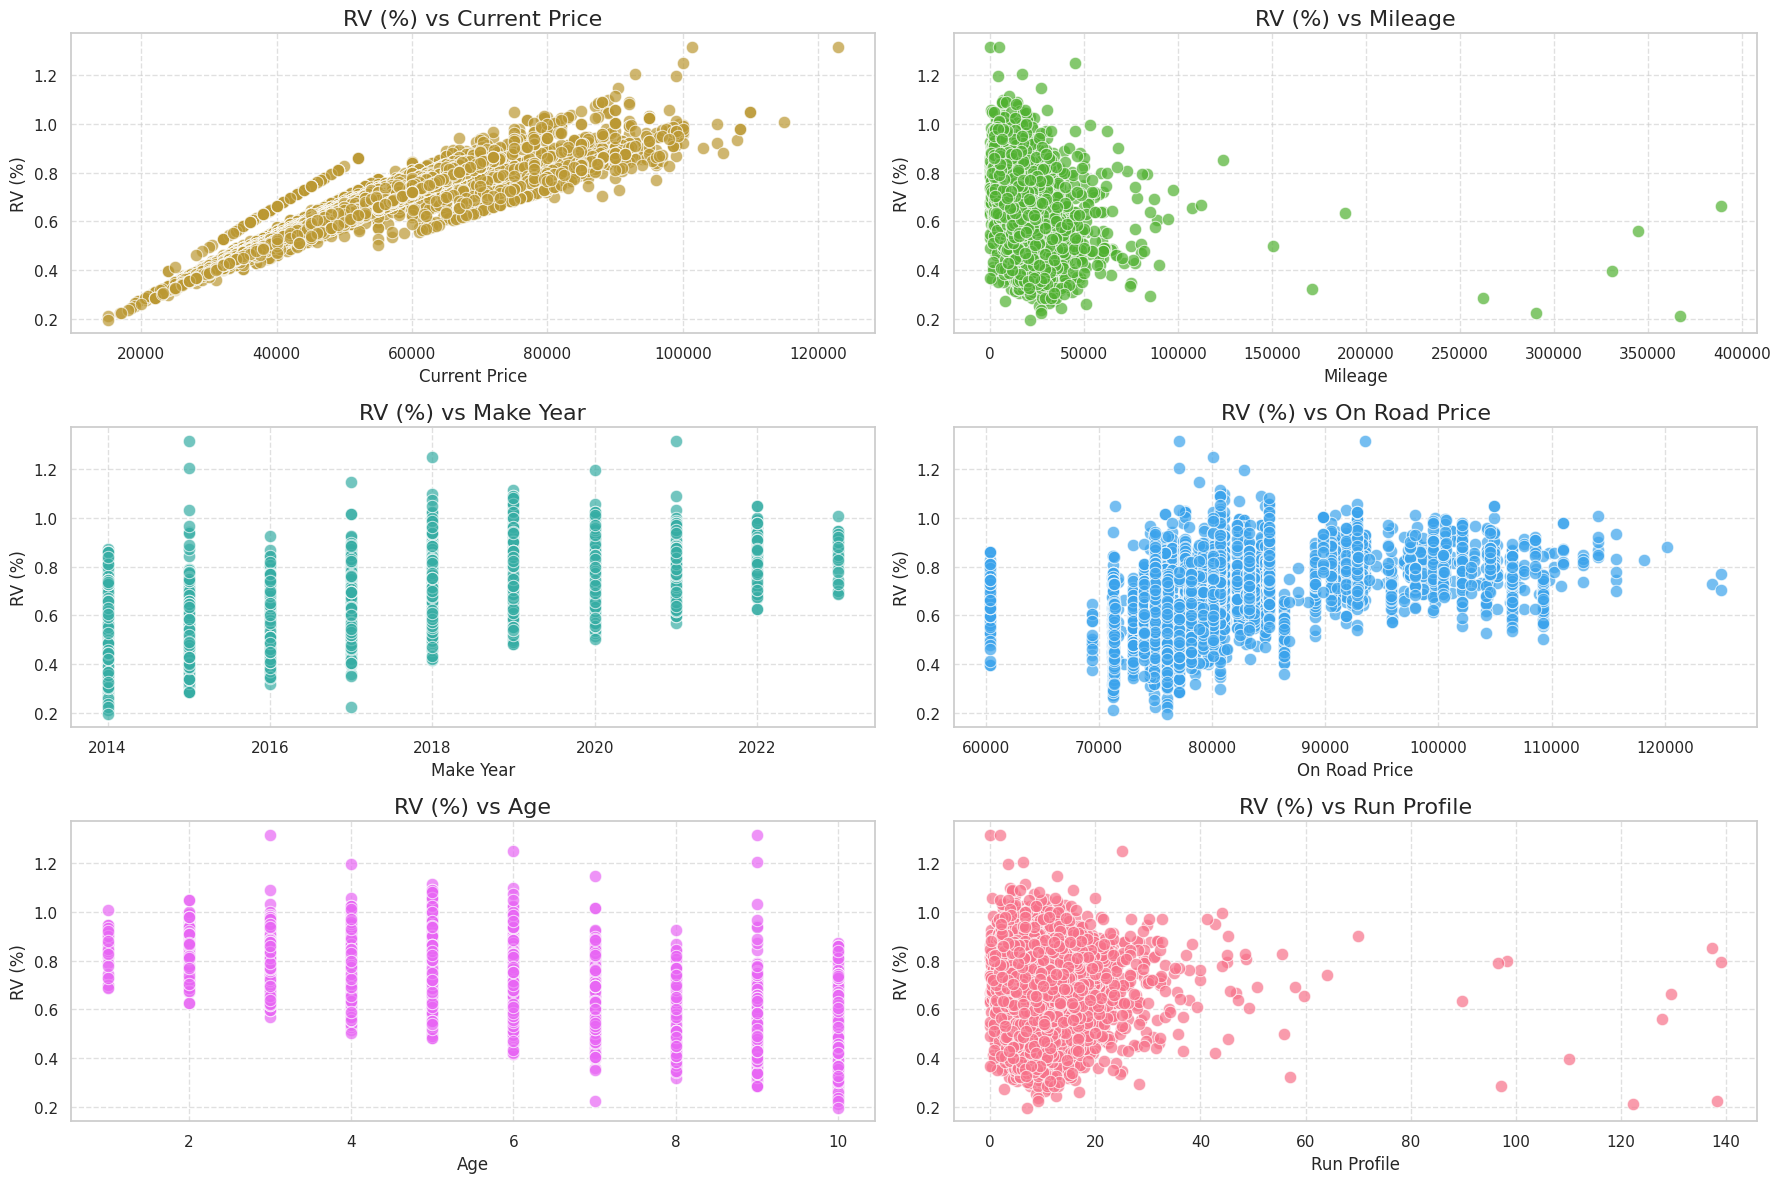

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette of the visualization
sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", len(numerical_cols))  # Use a vibrant color palette

# Plot RV (%) vs each numerical column with enhanced color
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=col, y='RV (%)', alpha=0.7, color=color_palette[i % len(color_palette)], edgecolor='w', s=80)
    plt.title(f'RV (%) vs {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('RV (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


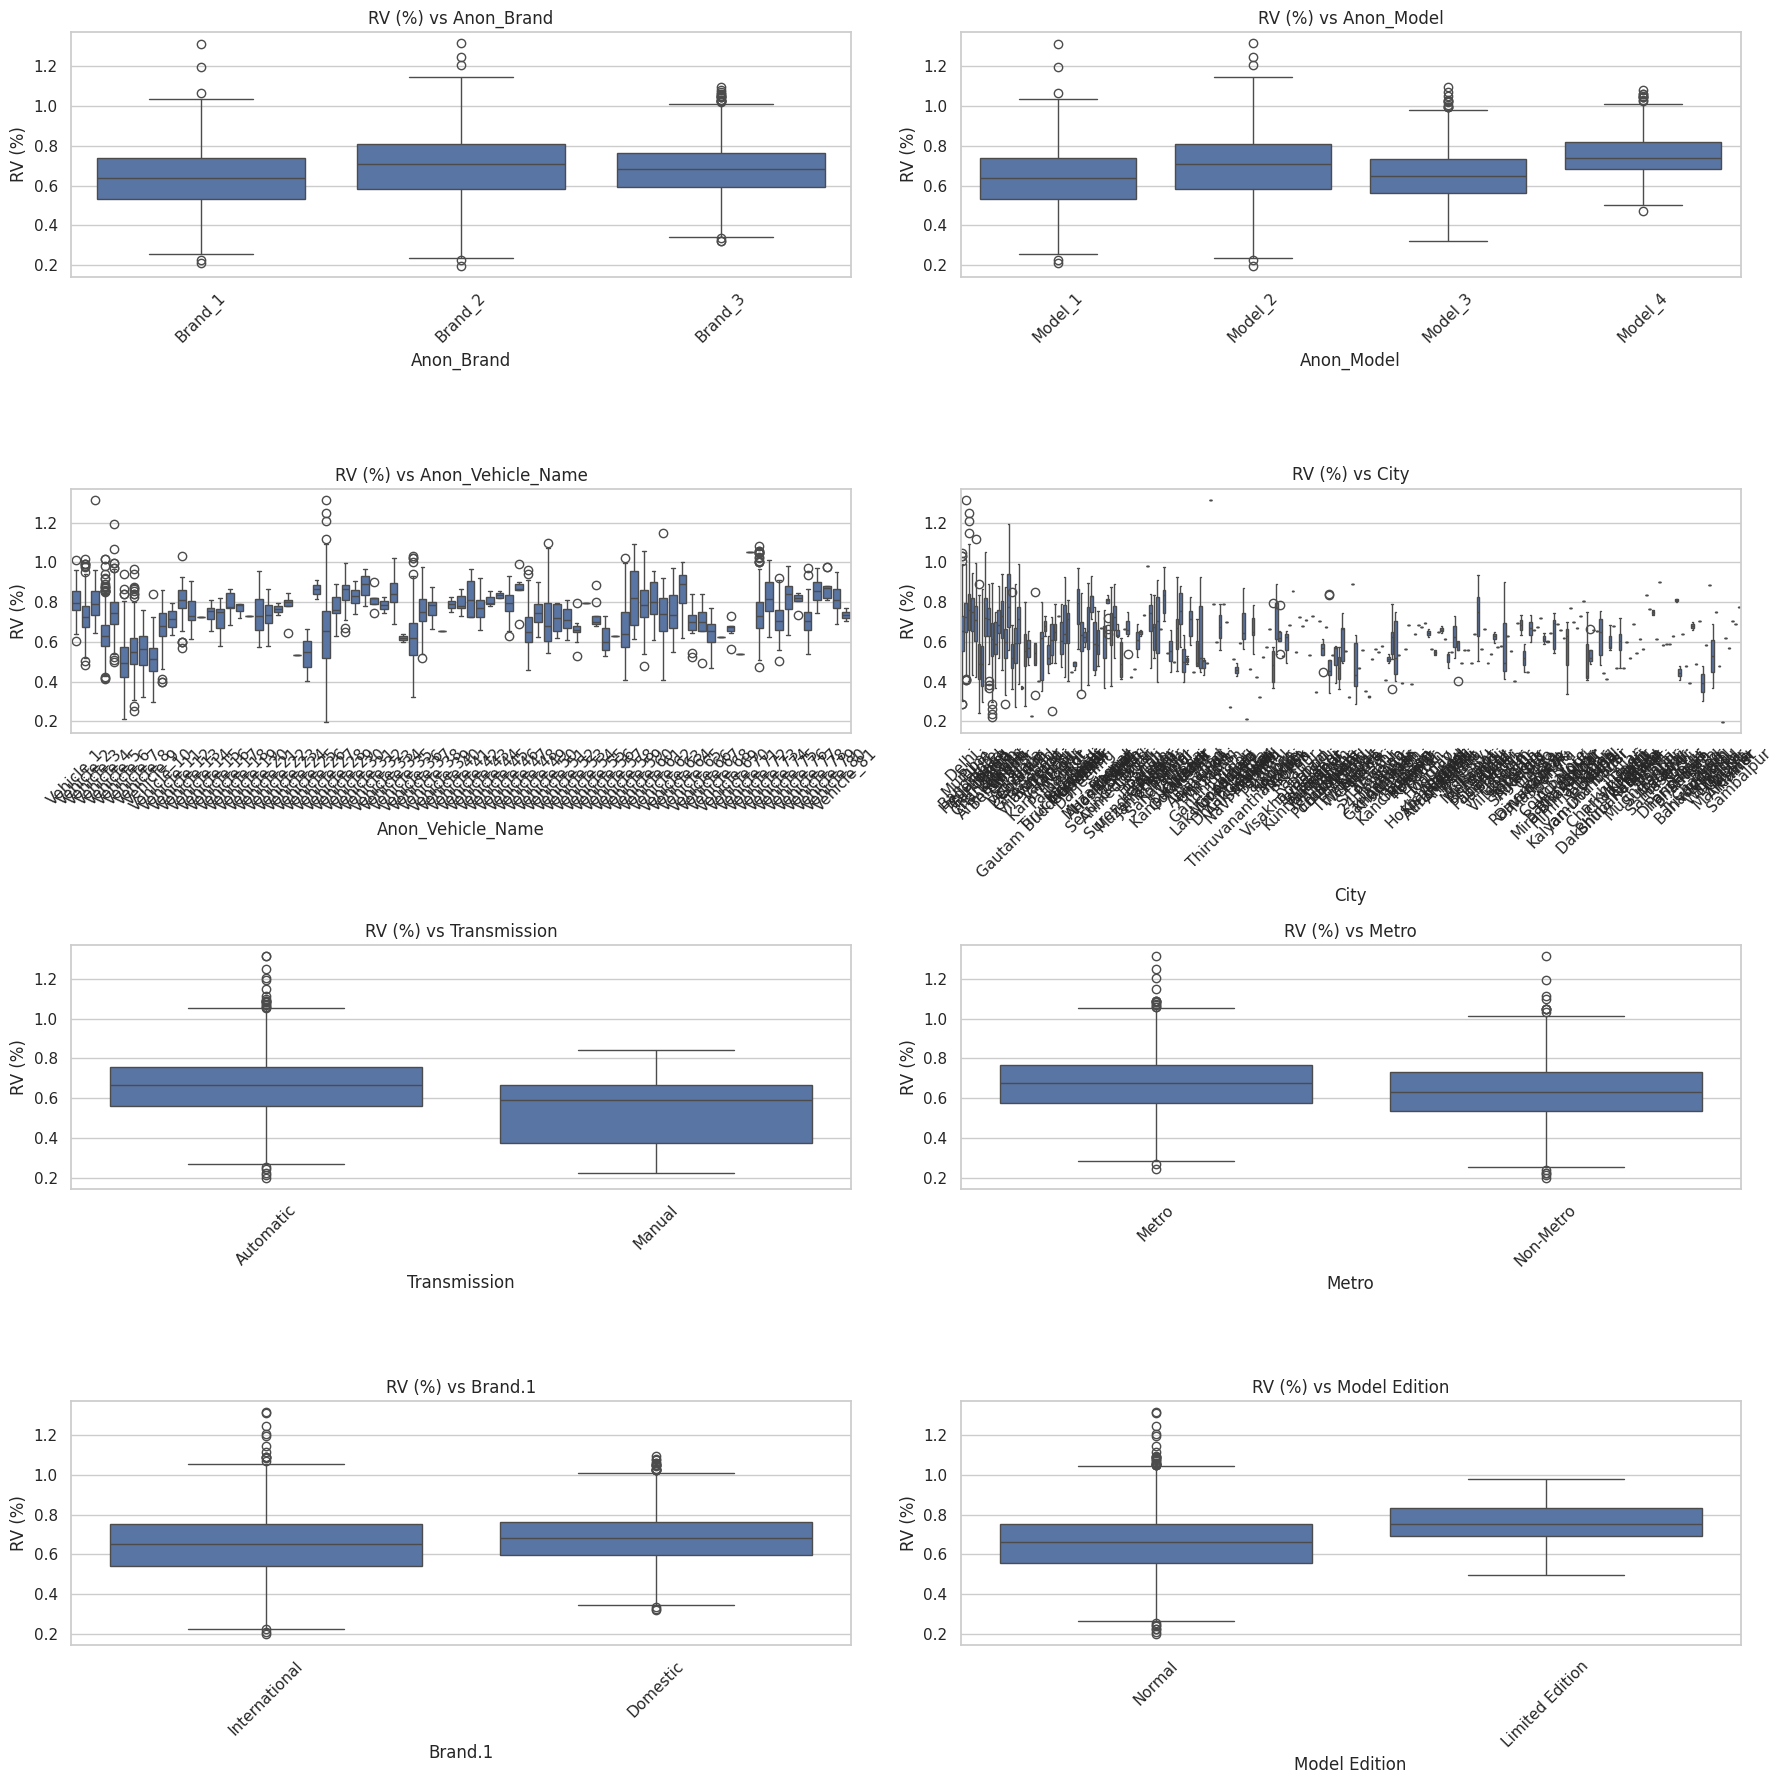

In [ ]:
# Plot RV (%) vs each categorical column
plt.figure(figsize=(18, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x=col, y='RV (%)')
    plt.title(f'RV (%) vs {col}')
    plt.xlabel(col)
    plt.ylabel('RV (%)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate target variable
target = df['RV (%)']
df = df.drop('RV (%)', axis=1)

# Convert categorical variables using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Re-add target variable (non-scaled)
df['RV (%)'] = target
df.head()

Anon_Brand  Anon_Model  Anon_Vehicle_Name  Current Price   Mileage  City  \
0           0           0                  0       0.429610  0.009416    63   
1           0           0                 11       0.371069 -0.375278   147   
2           0           0                 22       1.332105 -0.956091   147   
3           0           0                 33      -0.090748  0.209306    26   
4           0           0                 44       0.299520  0.473463    26   

   Make Year  Transmission  Owners  On Road Price  Metro       Age  \
0   1.173814             0       2       1.217935      0 -1.173814   
1   0.199469             0       2      -0.311320      0 -0.199469   
2   1.173814             0       2       1.388738      0 -1.173814   
3  -0.287703             0       2      -0.494648      0  0.287703   
4   0.199469             0       2      -0.098386      0 -0.199469   

   Run Profile  Brand.1  Model Edition    RV (%)  
0     0.786774        1              1  0.660139  
1    -0.379944        1              1  0.762974  
2    -0.830626        1              1  0.799600  
3     0.030423        1              1  0.685564  
4     0.567920        1              1  0.731123

# EDA

In [ ]:
df.info()
df.describe()
# Summary statistics for numerical features
# print(df.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 8387 entries, 0 to 8396
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anon_Brand         8387 non-null   int64  
 1   Anon_Model         8387 non-null   int64  
 2   Anon_Vehicle_Name  8387 non-null   int64  
 3   Current Price      8387 non-null   float64
 4   Mileage            8387 non-null   float64
 5   City               8387 non-null   int64  
 6   Make Year          8387 non-null   float64
 7   Transmission       8387 non-null   int64  
 8   Owners             8387 non-null   int64  
 9   On Road Price      8387 non-null   float64
 10  Metro              8387 non-null   int64  
 11  Age                8387 non-null   float64
 12  Run Profile        8387 non-null   float64
 13  Brand.1            8387 non-null   int64  
 14  Model Edition      8387 non-null   int64  
 15  RV (%)             8387 non-null   float64
dtypes: float64(7), int64(9)
memor

Anon_Brand  Anon_Model  Anon_Vehicle_Name  Current Price  \
count  8387.000000  8387.00000        8387.000000   8.387000e+03   
mean      0.795994     0.89448          39.264695  -3.388781e-17   
std       0.904315     1.06947          21.874810   1.000060e+00   
min       0.000000     0.00000           0.000000  -2.497401e+00   
25%       0.000000     0.00000          19.000000  -7.411947e-01   
50%       0.000000     0.00000          33.000000  -9.074788e-02   
75%       2.000000     2.00000          57.000000   6.247436e-01   
max       2.000000     3.00000          80.000000   4.525473e+00   

            Mileage         City     Make Year  Transmission       Owners  \
count  8.387000e+03  8387.000000  8.387000e+03    8387.00000  8387.000000   
mean   1.152186e-16    79.500060  3.805601e-14       0.01240     1.045547   
std    1.000060e+00    50.495006  1.000060e+00       0.11067     0.208512   
min   -1.310613e+00     0.000000 -1.749220e+00       0.00000     1.000000   
25%   -4.808805e-01    62.000000 -7.748751e-01       0.00000     1.000000   
50%   -1.037294e-01    63.000000  1.994693e-01       0.00000     1.000000   
75%    3.297680e-01    95.000000  6.866416e-01       0.00000     1.000000   
max    2.802284e+01   235.000000  2.635330e+00       1.00000     2.000000   

       On Road Price        Metro           Age   Run Profile      Brand.1  \
count   8.387000e+03  8387.000000  8.387000e+03  8.387000e+03  8387.000000   
mean   -1.965493e-16     0.296530  2.372147e-17  1.181838e-16     0.672350   
std     1.000060e+00     0.456755  1.000060e+00  1.000060e+00     0.469384   
min    -2.253235e+00     0.000000 -2.635330e+00 -1.424516e+00     0.000000   
25%    -5.948527e-01     0.000000 -6.866416e-01 -4.858456e-01     0.000000   
50%    -2.896848e-01     0.000000 -1.994693e-01 -1.407039e-01     1.000000   
75%     3.212202e-01     1.000000  7.748751e-01  2.813366e-01     1.000000   
max     5.097439e+00     1.000000  1.749220e+00  1.966083e+01     1.000000   

       Model Edition       RV (%)  
count    8387.000000  8387.000000  
mean        0.966973     0.657916  
std         0.178719     0.141122  
min         0.000000     0.197265  
25%         1.000000     0.560316  
50%         1.000000     0.664784  
75%         1.000000     0.757057  
max         1.000000     1.316117

In [ ]:
# Check for missing values
print(df.isnull().sum())

Anon_Brand           0
Anon_Model           0
Anon_Vehicle_Name    0
Current Price        0
Mileage              0
City                 0
Make Year            0
Transmission         0
Owners               0
On Road Price        0
Metro                0
Age                  0
Run Profile          0
Brand.1              0
Model Edition        0
RV (%)               0
dtype: int64


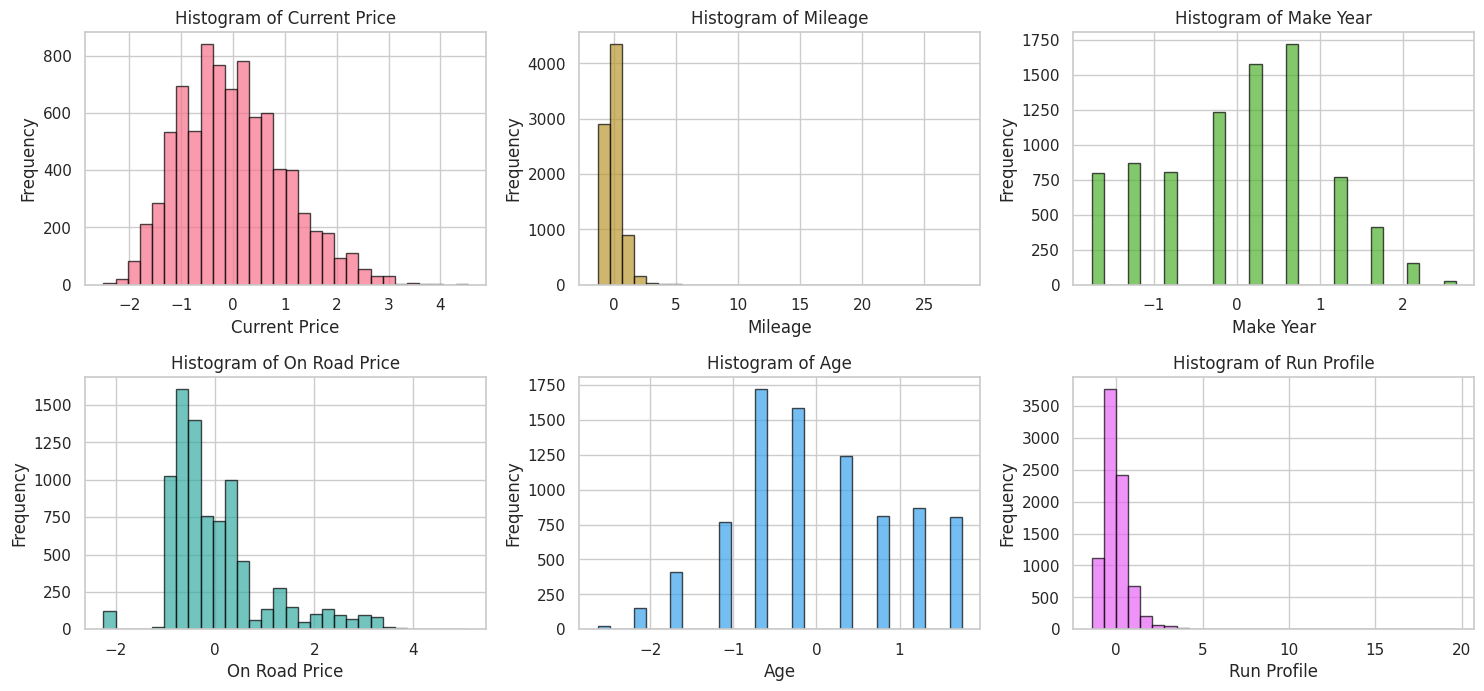

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette of the visualization
sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", len(numerical_cols))

# Plot histograms for numerical features with different colors
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    df[col].plot(kind='hist', bins=30, color=color_palette[i], edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-51-40a710e6c1a8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")  # Use a Seaborn color palette directly
<ipython-input-51-40a710e6c1a8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")  # Use a Seaborn color palette directly
<ipython-input-51-40a710e6c1a8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")  # Use a Seaborn color palette directly
<ipython-input-51-40a710e6c1a8>:8: FutureWarning: 

Passing `palette` wit

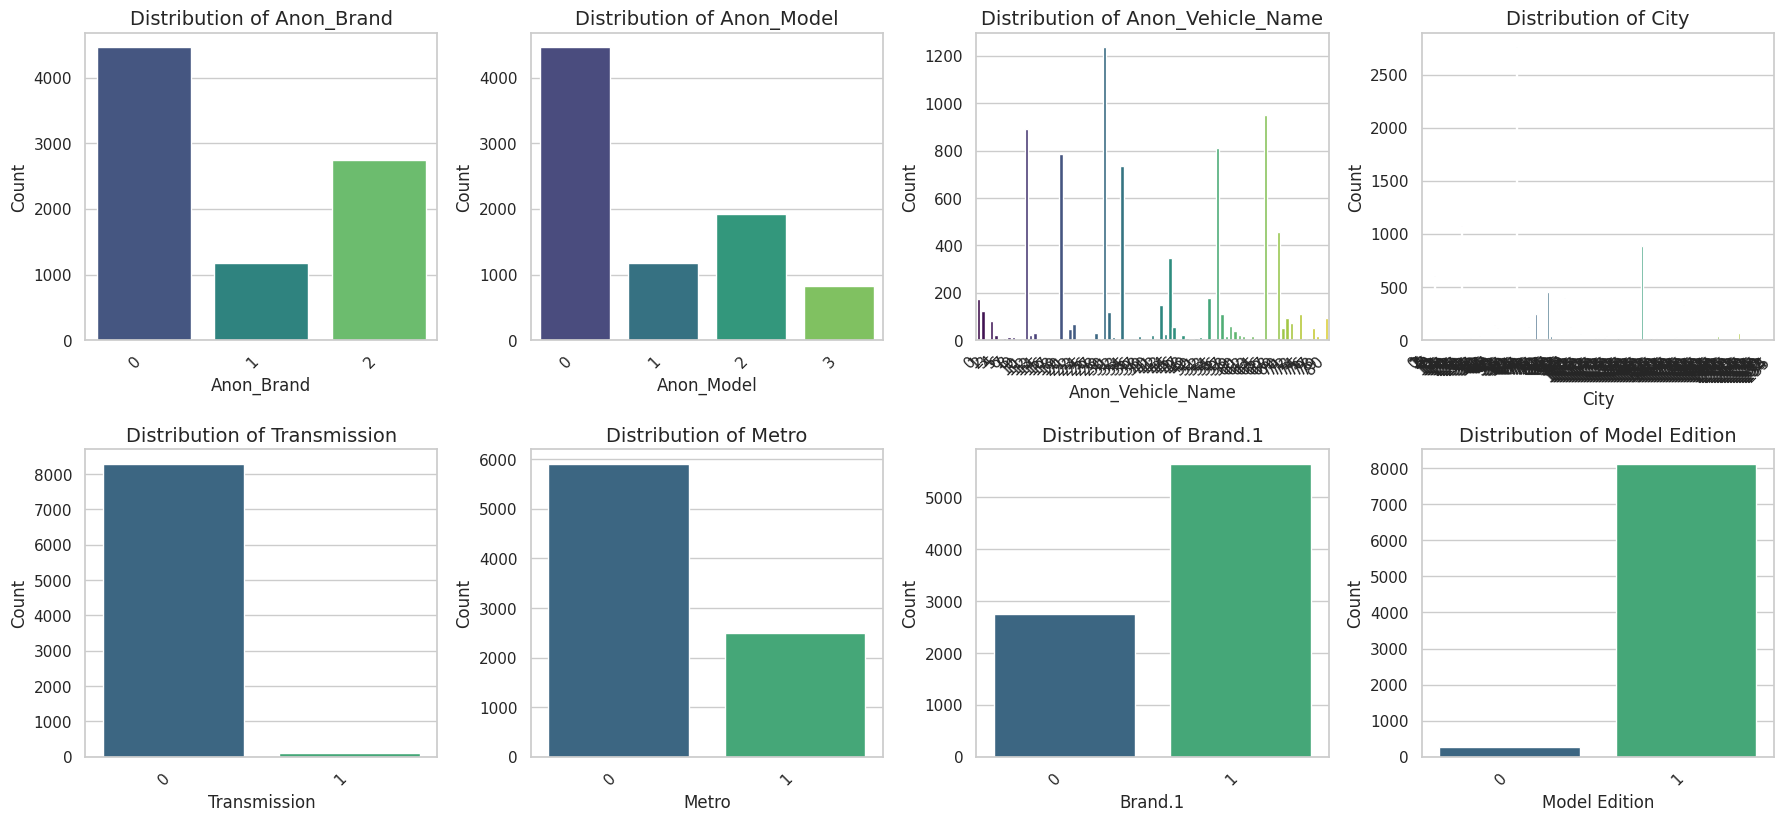

In [ ]:

# Plot the distribution of categorical features with enhanced color
plt.figure(figsize=(18, 12))  # Adjust size as needed
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i+1)  # Adjust layout according to the number of categorical columns
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

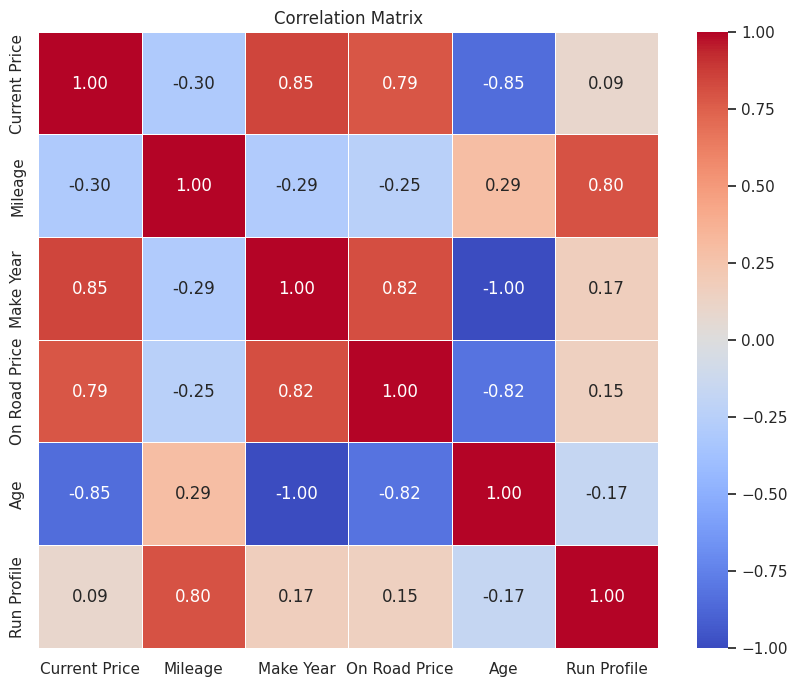

In [ ]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


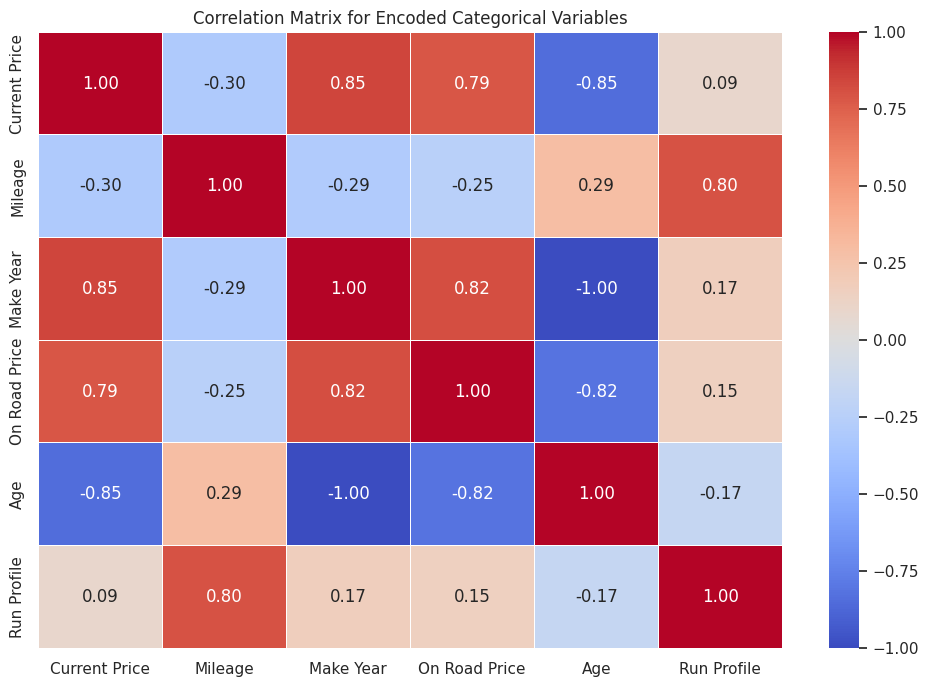

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Encoded Categorical Variables')
plt.show()

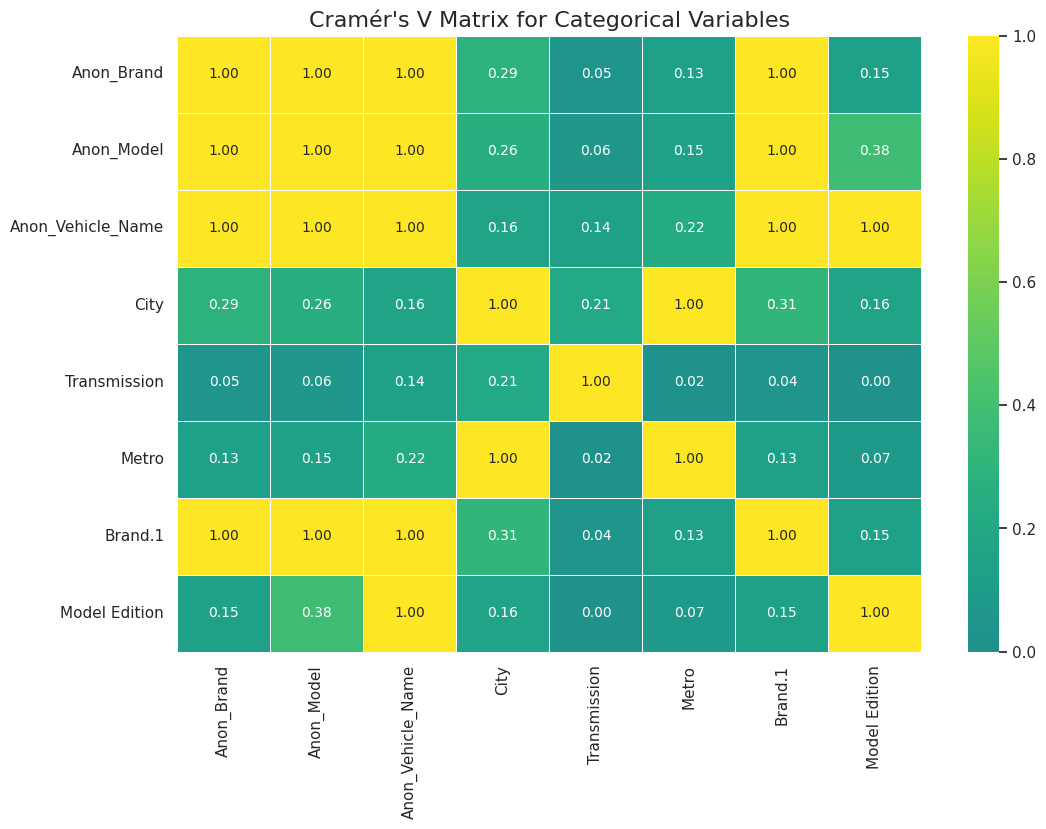

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Create an empty DataFrame for Cramér's V
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Compute Cramér's V for all pairs of categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot the heatmap of Cramér's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, center=0, annot_kws={"size": 10})
plt.title('Cramér\'s V Matrix for Categorical Variables', fontsize=16)
plt.show()

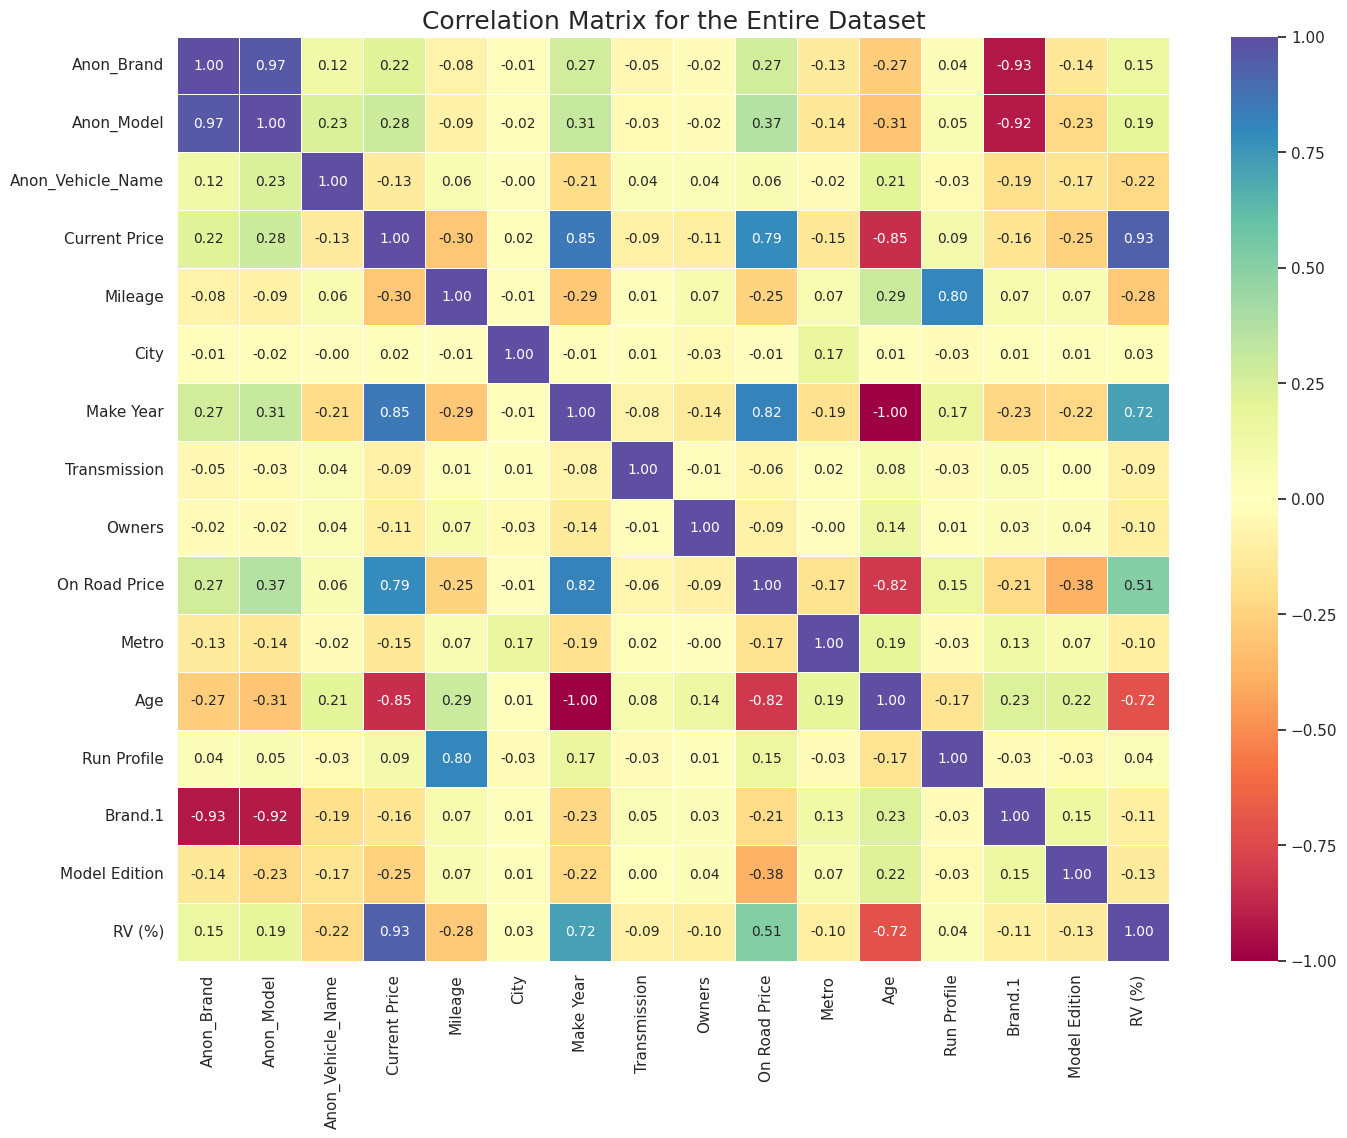

In [ ]:
# Compute the correlation matrix for the entire dataset
corr_matrix = df.corr()
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5, center=0, annot_kws={"size": 10})
plt.title('Correlation Matrix for the Entire Dataset', fontsize=18)
plt.show()

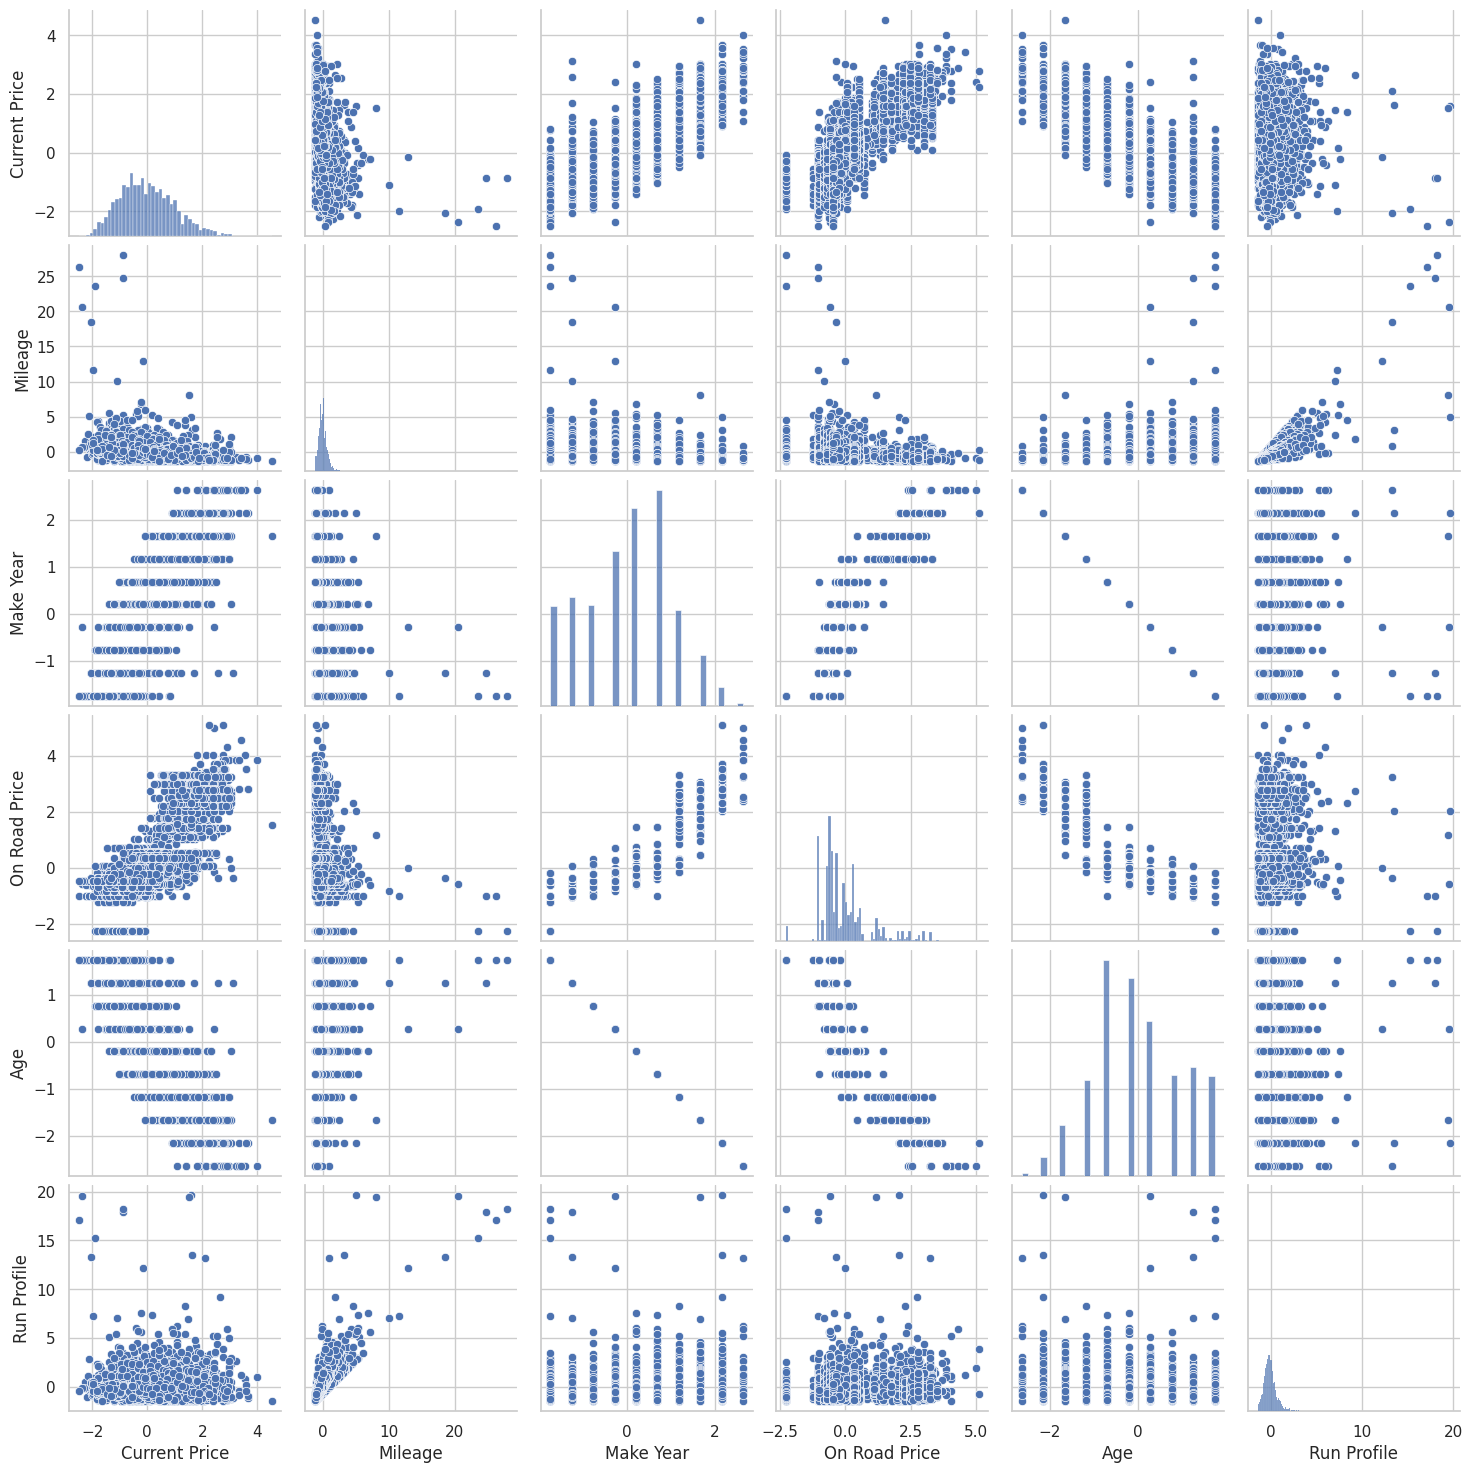

In [ ]:
# Pairplot to show pairwise relationships
sns.pairplot(df[numerical_cols])
plt.show()


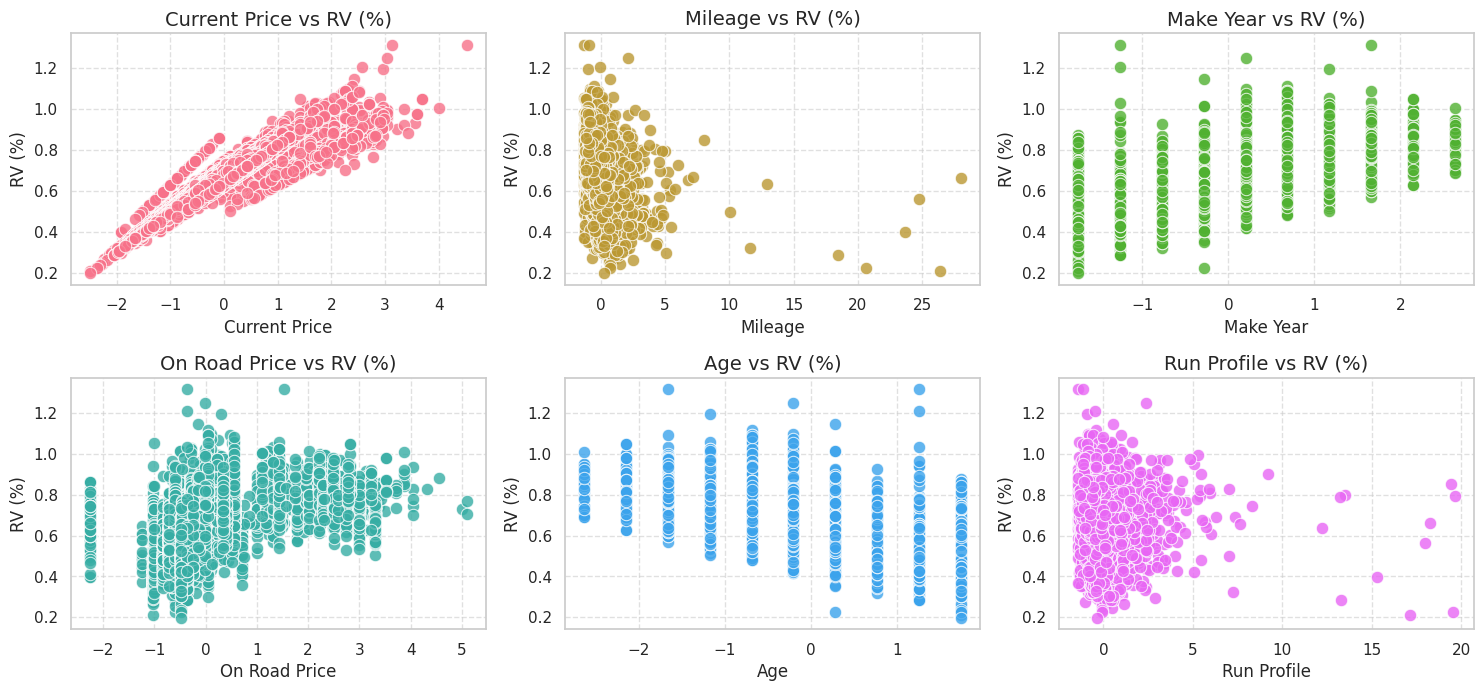

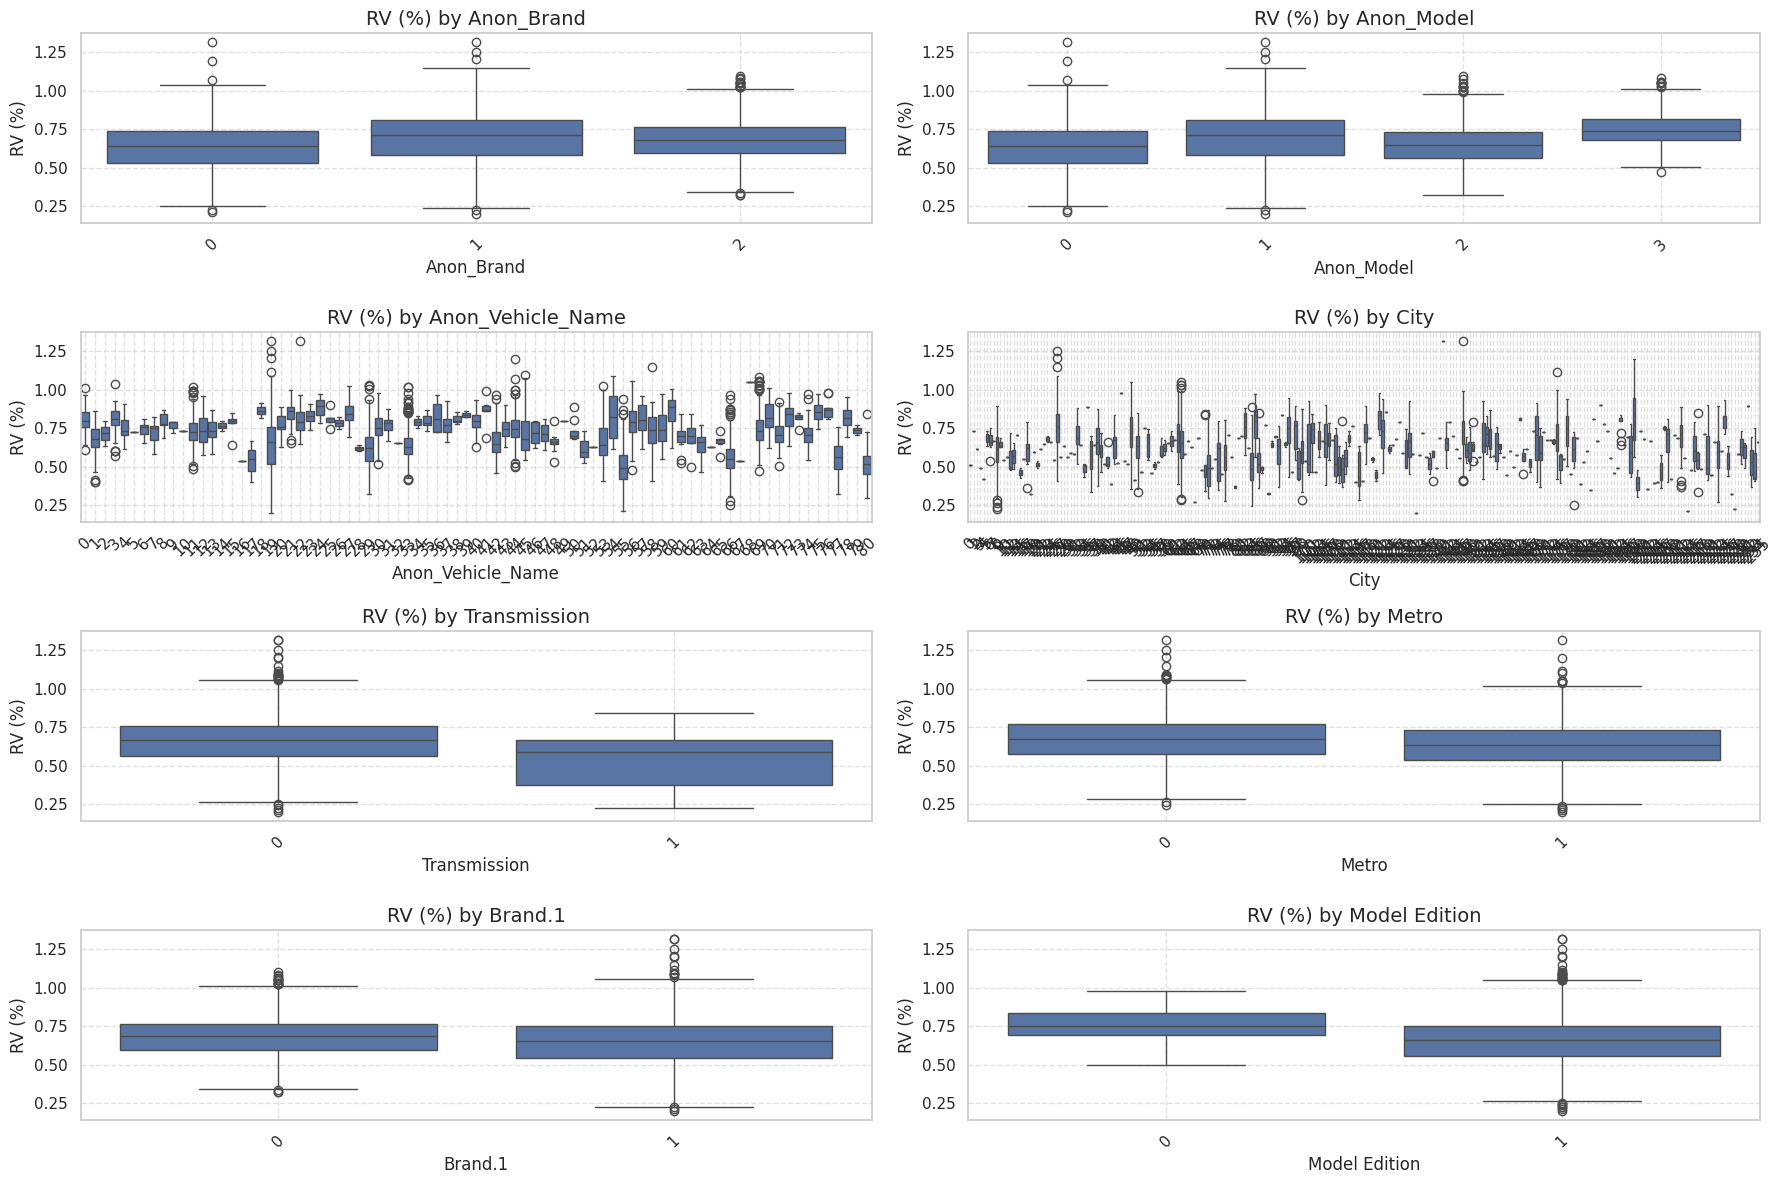

In [ ]:
# Set the style and color palette of the visualization
sns.set(style="whitegrid")
# 2. Scatter plots for numerical features vs. RV (%)
plt.figure(figsize=(15, 10))
color_palette = sns.color_palette("husl", len(numerical_cols))  # Use a vibrant color palette
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['RV (%)'], color=color_palette[i % len(color_palette)], alpha=0.8, edgecolor='w', s=80)
    plt.title(f'{col} vs RV (%)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('RV (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 3. Boxplots for categorical features vs. RV (%)
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], y=df['RV (%)'])
    plt.title(f'RV (%) by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('RV (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
# Use z-scores to detect outliers
from scipy import stats

# Calculate z-scores
z_scores = np.abs(stats.zscore(df[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3
outliers = (z_scores > threshold).sum(axis=0)
print("Outliers detected in each feature:")
print(outliers)


Outliers detected in each feature:
Current Price     19
Mileage           65
Make Year          0
On Road Price    128
Age                0
Run Profile       86
dtype: int64


#Model devlopment


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assume df is your DataFrame
# Define features and target
X = df.drop(columns=['RV (%)'])  # Features
y = df['RV (%)']  # Target


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"  R^2 Score: {metrics['R2']:.2f}")


Linear Regression:
  Mean Squared Error: 0.00
  R^2 Score: 0.99
Decision Tree:
  Mean Squared Error: 0.00
  R^2 Score: 1.00
Random Forest:
  Mean Squared Error: 0.00
  R^2 Score: 1.00


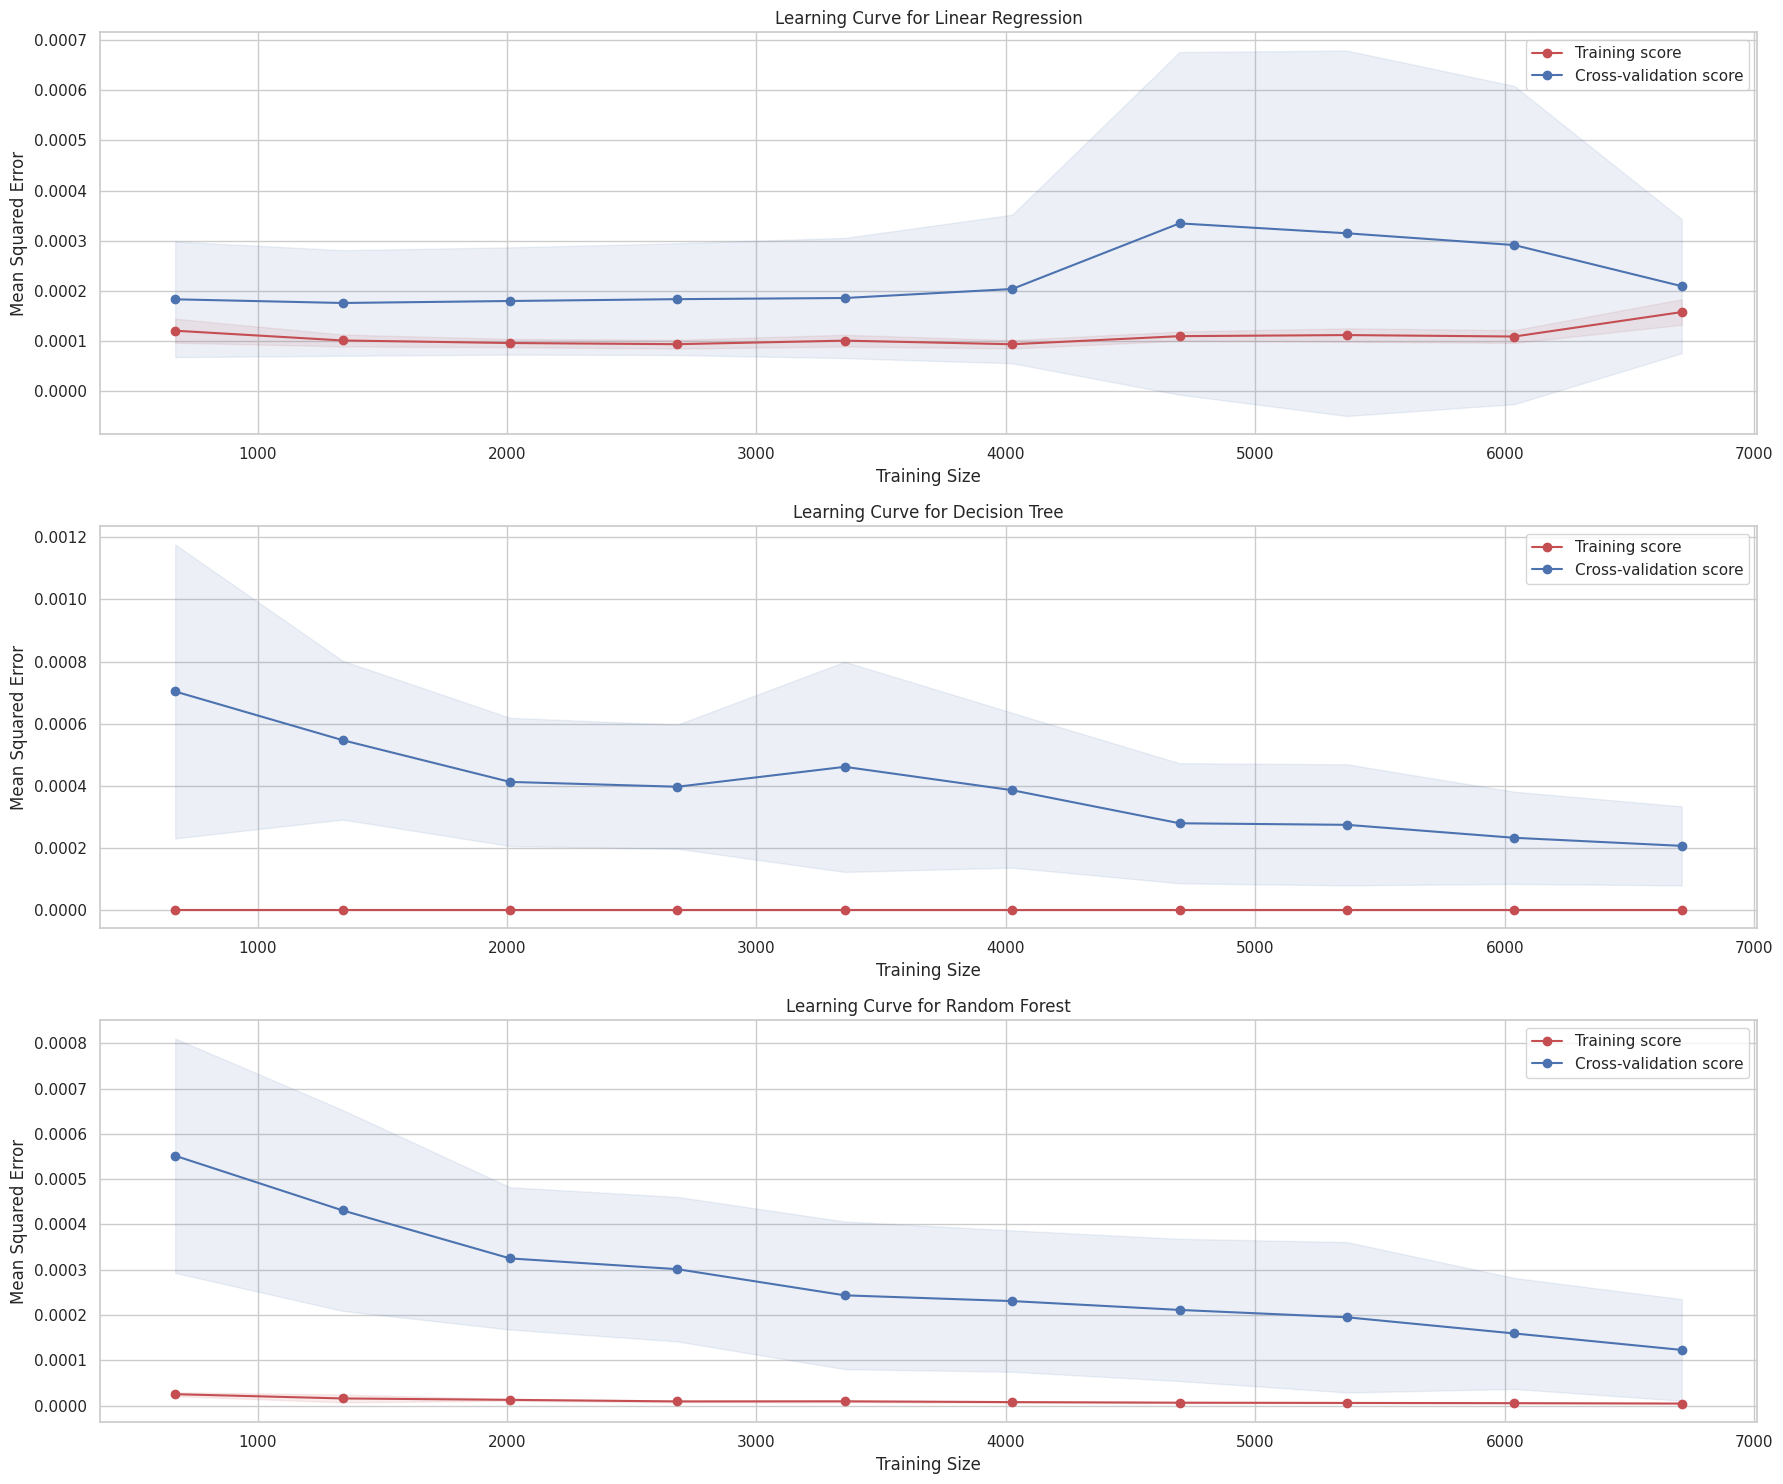

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Create a plot for each model
plt.figure(figsize=(18, 15))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 1, i)  # Adjust subplot grid according to the number of models

    # Create learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,  # Number of cross-validation folds
        n_jobs=-1,  # Use all available cores
        train_sizes=np.linspace(0.1, 1.0, 10),  # Training sizes from 10% to 100%
        scoring='neg_mean_squared_error'  # Use MSE as the metric
    )

    # Calculate mean and std deviation of training and test scores
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = -test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot learning curves
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='b', label='Cross-validation score')

    # Plot the confidence intervals
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='b')

    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curve for {name}')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


# taking random forest model and making prediction

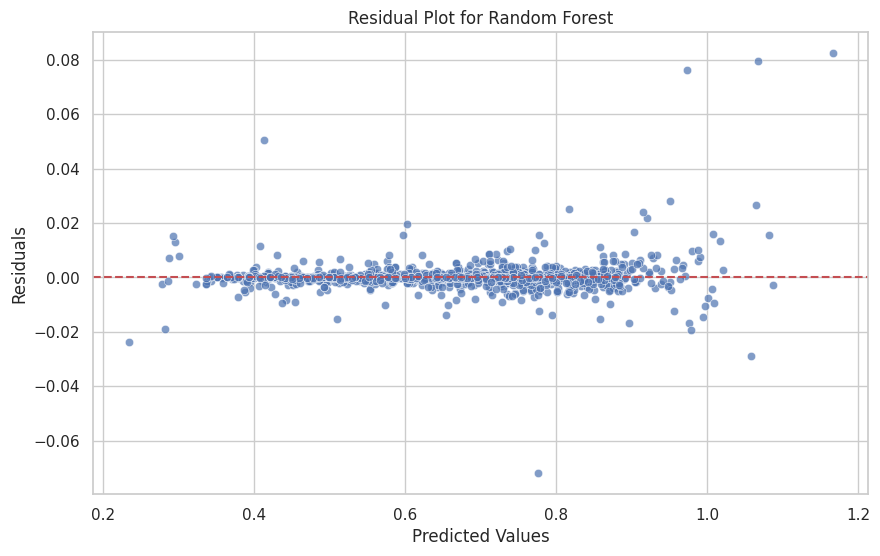

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Sample data (replace with your actual dataset)
# Load or generate your dataset
# X, y = ...

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
model_random_forest = RandomForestRegressor()
model_random_forest.fit(X_train_scaled, y_train)

# Predict using the Random Forest model
y_pred = model_random_forest.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.grid(True)
plt.show()


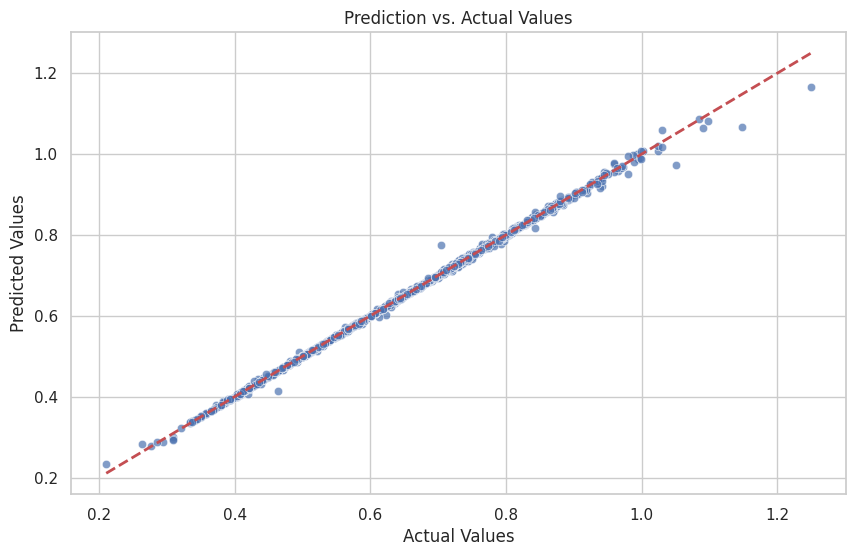

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual Values')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

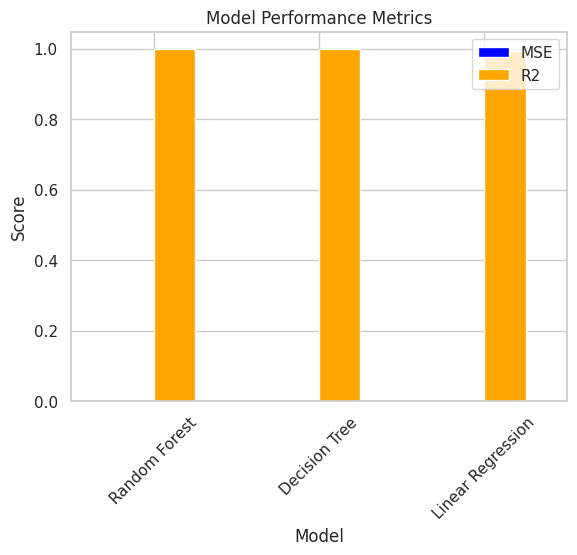

In [ ]:
import matplotlib.pyplot as plt

# Performance metrics
metrics = pd.DataFrame(results).T
metrics.sort_values(by='R2', ascending=False, inplace=True)

# Plot performance metrics
plt.figure(figsize=(10, 6))
metrics[['MSE', 'R2']].plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.show()


#for giving input and showing the predicted RV

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Example data (replace with your actual data)
df = pd.DataFrame({
    'Current Price': np.random.rand(100) * 10000,
    'Mileage': np.random.rand(100) * 100000,
    'City': np.random.choice(['CityA', 'CityB', 'CityC'], 100),
    'Make Year': np.random.randint(2000, 2024, 100),
    'Transmission': np.random.choice(['Manual', 'Automatic'], 100),
    'Owners': np.random.randint(1, 5, 100),
    'On Road Price': np.random.rand(100) * 20000,
    'Metro': np.random.choice(['Yes', 'No'], 100),
    'Age': np.random.randint(1, 20, 100),
    'Run Profile': np.random.rand(100) * 100,
    'Brand.1': np.random.choice(['BrandX', 'BrandY', 'BrandZ'], 100),
    'Model Edition': np.random.choice(['Edition1', 'Edition2', 'Edition3'], 100),
    'RV (%)': np.random.rand(100) * 100
})

# Define categorical and numerical columns
categorical_cols = ['City', 'Transmission', 'Metro', 'Brand.1', 'Model Edition']
numerical_cols = ['Current Price', 'Mileage', 'Make Year', 'Owners', 'On Road Price', 'Age', 'Run Profile']

# Fit LabelEncoders with the actual data
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    label_encoders[col] = le

# Fit StandardScaler with the numerical columns
scaler = StandardScaler()
scaler.fit(df[numerical_cols])

# Train the Random Forest model (Example: replace with your actual model)
X = df[categorical_cols + numerical_cols]
y = df['RV (%)']
X_encoded = pd.DataFrame()
for col in categorical_cols:
    X_encoded[col] = label_encoders[col].transform(X[col])
X_encoded[numerical_cols] = scaler.transform(X[numerical_cols])
model = RandomForestRegressor()
model.fit(X_encoded, y)

# Define preprocessing and prediction functions
def preprocess_input(input_dict):
    # Convert categorical variables using the label encoders
    for col, le in label_encoders.items():
        if col in input_dict:
            input_dict[col] = le.transform([input_dict[col]])[0]

    # Convert input_dict to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Scale numerical features
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    return input_df

def predict_rv(input_dict):
    # Preprocess the input
    preprocessed_input = preprocess_input(input_dict)

    # Predict RV (%)
    prediction = model.predict(preprocessed_input)
    return prediction[0]

def on_button_click(b):
    # Gather input from widgets
    input_dict = {name: widget.value for name, widget in widgets_dict.items()}
    predicted_rv = predict_rv(input_dict)
    print(f"Predicted RV (%): {predicted_rv:.2f}")

# Create widgets
widgets_dict = {
    'Current Price': widgets.FloatText(description='Current Price:'),
    'Mileage': widgets.FloatText(description='Mileage:'),
    'City': widgets.Text(description='City:'),
    'Make Year': widgets.IntText(description='Make Year:'),
    'Transmission': widgets.Text(description='Transmission:'),
    'Owners': widgets.IntText(description='Owners:'),
    'On Road Price': widgets.FloatText(description='On Road Price:'),
    'Metro': widgets.Text(description='Metro:'),
    'Age': widgets.IntText(description='Age:'),
    'Run Profile': widgets.FloatText(description='Run Profile:'),
    'Brand.1': widgets.Text(description='Brand.1:'),
    'Model Edition': widgets.Text(description='Model Edition:')
}

# Display widgets
for widget in widgets_dict.values():
    display(widget)

# Button to trigger prediction
button = widgets.Button(description="Predict RV (%)")
button.on_click(on_button_click)
display(button)


FloatText(value=0.0, description='Current Price:')

FloatText(value=0.0, description='Mileage:')

Text(value='', description='City:')

IntText(value=0, description='Make Year:')

Text(value='', description='Transmission:')

IntText(value=0, description='Owners:')

FloatText(value=0.0, description='On Road Price:')

Text(value='', description='Metro:')

IntText(value=0, description='Age:')

FloatText(value=0.0, description='Run Profile:')

Text(value='', description='Brand.1:')

Text(value='', description='Model Edition:')

Button(description='Predict RV (%)', style=ButtonStyle())

ValueError: y contains previously unseen labels: 'Delhi'

ValueError: y contains previously unseen labels: 'Delhi'

ValueError: y contains previously unseen labels: ''

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


#doing hyperparameter tunning for best model and accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Random Forest Model MSE: {mse:.2f}")
print(f"Best Random Forest Model R^2 Score: {r2:.2f}")
